<a href="https://colab.research.google.com/github/vamvieira/Aulas_Senai/blob/main/Base_RH_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

#Módulo Análise Exploratória - Análise I.V (Information Value)
import aed

In [93]:
df = pd.read_csv("base_rh.csv")
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


In [94]:
df.columns

Index(['Funcionario_Deixou_Empresa', 'Freq_Viagens', 'Formacao',
       'Estado_Civil', 'Faz_hora_extras', 'Equilibrio_de_Vida', 'Idade',
       'Tempo_de_empresa'],
      dtype='object')

In [95]:
columns = ['funcionario_deixou_empresa', 'freq_viagens', 'formacao',
       'estado_civil', 'faz_hora_extras', 'equilibrio_de_vida', 'idade',
       'tempo_de_empresa']

In [96]:
df.columns = columns

In [97]:
df.columns

Index(['funcionario_deixou_empresa', 'freq_viagens', 'formacao',
       'estado_civil', 'faz_hora_extras', 'equilibrio_de_vida', 'idade',
       'tempo_de_empresa'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   funcionario_deixou_empresa  1470 non-null   object
 1   freq_viagens                1470 non-null   object
 2   formacao                    1470 non-null   object
 3   estado_civil                1470 non-null   object
 4   faz_hora_extras             1470 non-null   object
 5   equilibrio_de_vida          1470 non-null   object
 6   idade                       1470 non-null   int64 
 7   tempo_de_empresa            1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


In [99]:
df.tail()

,funcionario_deixou_empresa,freq_viagens,formacao,estado_civil,faz_hora_extras,equilibrio_de_vida,idade,tempo_de_empresa
1465,Não,Viaja frequentemente,Ensino Técnico,Casado,Não,Muito bom,36,5
1466,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,39,7
1467,Não,Viaja raramente,Ensino Superior,Casado,Sim,Muito bom,27,6
1468,Não,Viaja frequentemente,Ensino Superior,Casado,Não,Bom,49,9
1469,Não,Viaja raramente,Ensino Superior,Casado,Não,Excelente,34,4


In [100]:
df.query("tempo_de_empresa > 5 and equilibrio_de_vida == 'Muito bom'").head()

,funcionario_deixou_empresa,freq_viagens,formacao,estado_civil,faz_hora_extras,equilibrio_de_vida,idade,tempo_de_empresa
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
8,Não,Viaja frequentemente,Ensino Superior,Solteiro,Não,Muito bom,38,9
11,Não,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,29,9
15,Não,Viaja raramente,Mestrado,Divorciado,Não,Muito bom,29,10


In [101]:
df[['formacao','equilibrio_de_vida']]

,formacao,equilibrio_de_vida
0,Ensino Técnico,Ruim
1,Ensino Médio,Muito bom
2,Ensino Técnico,Muito bom
3,Mestrado,Muito bom
4,Ensino Médio,Muito bom
...,...,...
1465,Ensino Técnico,Muito bom
1466,Ensino Médio,Muito bom
1467,Ensino Superior,Muito bom
1468,Ensino Superior,Bom


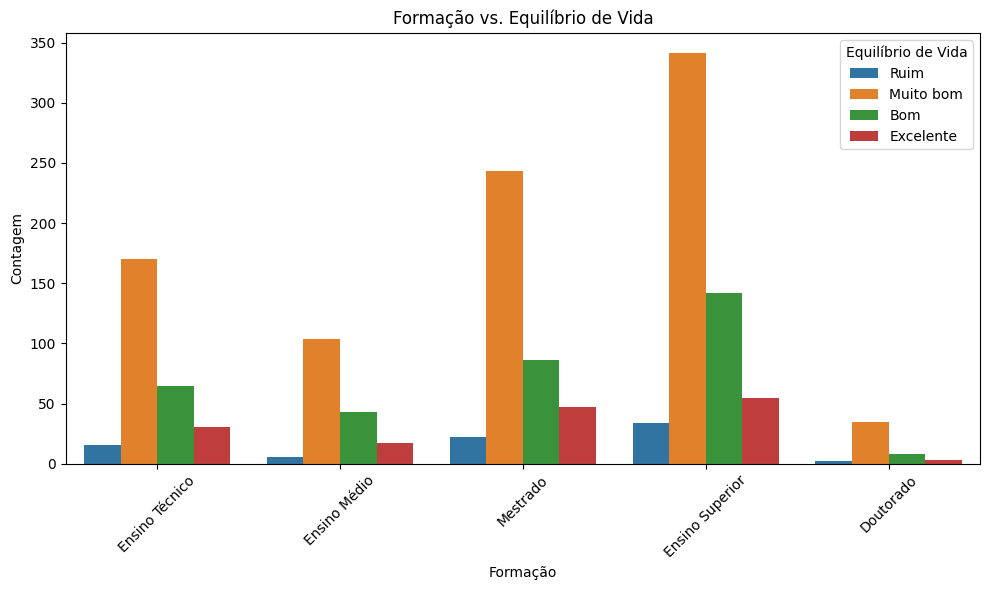

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='formacao', hue='equilibrio_de_vida')

plt.title('Formação vs. Equilíbrio de Vida')
plt.xlabel('Formação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Equilíbrio de Vida')
plt.tight_layout()
plt.show()


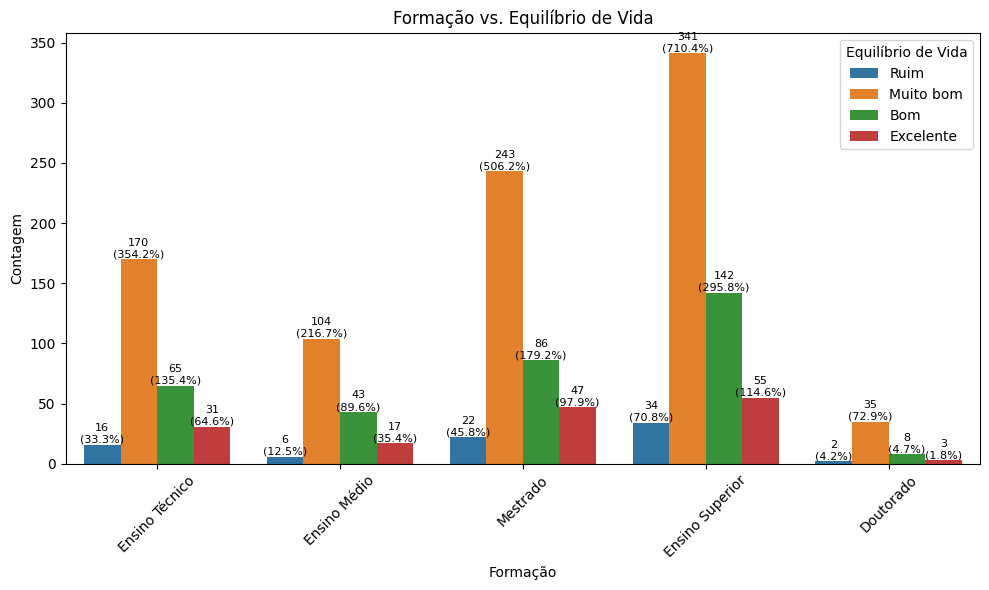

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Conta quantos registros existem para cada combinação
contagem = df.groupby(['formacao', 'equilibrio_de_vida']).size().reset_index(name='contagem')

# 2. Calcula o total por formação
total_por_formacao = contagem.groupby('formacao')['contagem'].transform('sum')

# 3. Adiciona coluna de porcentagem
contagem['porcentagem'] = contagem['contagem'] / total_por_formacao * 100

# 4. Cria o gráfico de barras com valores absolutos
plt.figure(figsize=(10, 6))
grafico = sns.countplot(data=df, x='formacao', hue='equilibrio_de_vida')

# 5. Adiciona os rótulos de porcentagem nas barras
for p in grafico.patches:
    altura = p.get_height()
    if altura > 0:
        # Pega os valores da barra (formacao e equilibrio)
        formacao = p.get_x() + p.get_width() / 2.0
        grafico.annotate(
            f'{altura:.0f}\n({altura / total_por_formacao.iloc[int(formacao)]:.1%})',
            (p.get_x() + p.get_width() / 2., altura),
            ha='center', va='bottom', fontsize=8
        )

# 6. Estilo do gráfico
plt.title('Formação vs. Equilíbrio de Vida')
plt.xlabel('Formação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Equilíbrio de Vida')
plt.tight_layout()
plt.show()


In [104]:
df[['estado_civil', 'faz_hora_extras']]

,estado_civil,faz_hora_extras
0,Solteiro,Sim
1,Casado,Não
2,Solteiro,Sim
3,Casado,Sim
4,Casado,Não
...,...,...
1465,Casado,Não
1466,Casado,Não
1467,Casado,Sim
1468,Casado,Não


In [105]:
df.groupby(['estado_civil', 'faz_hora_extras']).size().reset_index(name='contagem')

,estado_civil,faz_hora_extras,contagem
0,Casado,Não,487
1,Casado,Sim,186
2,Divorciado,Não,228
3,Divorciado,Sim,99
4,Solteiro,Não,339
5,Solteiro,Sim,131


In [106]:
df.groupby(['funcionario_deixou_empresa', 'faz_hora_extras']).size().reset_index(name='contagem')

,funcionario_deixou_empresa,faz_hora_extras,contagem
0,Não,Não,944
1,Não,Sim,289
2,Sim,Não,110
3,Sim,Sim,127


In [107]:
df_grouped = df.groupby(['funcionario_deixou_empresa', 'faz_hora_extras']).size().reset_index(name='contagem')
totais = df_grouped.groupby('funcionario_deixou_empresa')['contagem'].transform('sum')
df_grouped['percentual'] = df_grouped['contagem'] / totais * 100
df_grouped

,funcionario_deixou_empresa,faz_hora_extras,contagem,percentual
0,Não,Não,944,76.561233
1,Não,Sim,289,23.438767
2,Sim,Não,110,46.413502
3,Sim,Sim,127,53.586498


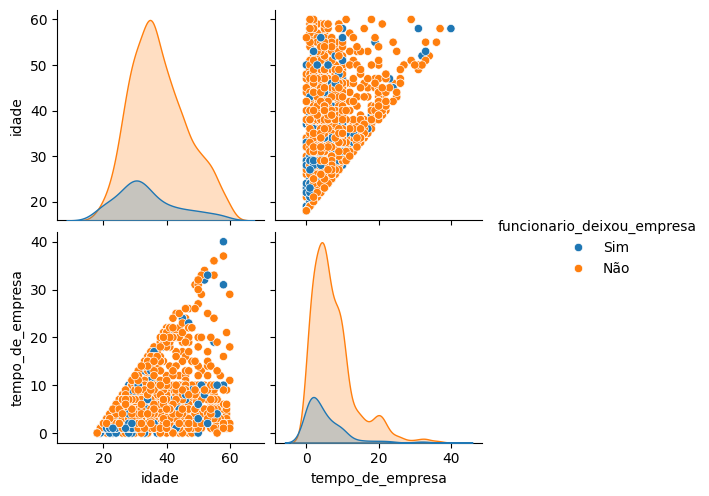

In [108]:
sns.pairplot(df, hue='funcionario_deixou_empresa')

In [111]:
df['Target'] = np.where(df['funcionario_deixou_empresa'] == 'Sim', 1,0)

In [112]:
df.head()

,funcionario_deixou_empresa,freq_viagens,formacao,estado_civil,faz_hora_extras,equilibrio_de_vida,idade,tempo_de_empresa,Target
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6,1
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10,0
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0,1
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8,0
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2,0


In [116]:
#Módulo Análise Exploratória - Análise I.V (Information Value)

#Melhor de 0.3 a 0.5

df_rh_iv = aed.analise_iv(df, 'Target')
df_rh_iv.get_lista_iv()

/content/aed.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',


Target,IV
Variavel,
funcionario_deixou_empresa,9.21
faz_hora_extras,0.40
tempo_de_empresa,0.34
idade,0.31
estado_civil,0.22
freq_viagens,0.13
equilibrio_de_vida,0.06
formacao,0.01


In [120]:
#Criação das variáveis Dummies
df_rh_modelo = pd.get_dummies(df)
df_rh_modelo.head()

,idade,tempo_de_empresa,Target,funcionario_deixou_empresa_Não,funcionario_deixou_empresa_Sim,freq_viagens_Não viaja,freq_viagens_Viaja frequentemente,freq_viagens_Viaja raramente,formacao_Doutorado,formacao_Ensino Médio,...,formacao_Mestrado,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Solteiro,faz_hora_extras_Não,faz_hora_extras_Sim,equilibrio_de_vida_Bom,equilibrio_de_vida_Excelente,equilibrio_de_vida_Muito bom,equilibrio_de_vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
